# Load libraries and data

In [61]:
#loading packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import networkx as nx

In [2]:
titanic = pd.read_csv("titanic.csv")

In [3]:
titanic.info()
titanic.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
#compute family size
titanic['family size'] = titanic['SibSp']+titanic['Parch'] + 1

In [5]:
#convert Survived and Pclass to categorical variables
d_Survived={0:"No",1:"Yes"}
d_Pclass={1:"1st", 2:"2nd", 3:"3rd"}
titanic['Survived'] = titanic['Survived'].astype('category').apply(lambda x:d_Survived[x])
titanic['Pclass'] = titanic['Pclass'].astype('category').apply(lambda x:d_Pclass[x])
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family size
0,1,No,3rd,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,Yes,1st,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,Yes,3rd,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,Yes,1st,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,No,3rd,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


## 1. Generate a series of bar charts to describe the gender, ticket class and survival of the passengers onboard. 

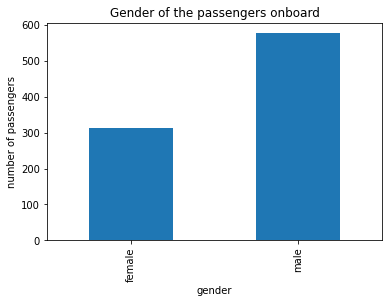

In [6]:
# Bar chart on gender
titanic.groupby('Sex').size().plot.bar(title = 'Gender of the passengers onboard',
                                      ylabel = "number of passengers", xlabel = "gender")
plt.show()

#Note here we did not call fig, ax = plt.subplots() and then pass ax into pandas Dataframe/Series plot().
#We could of course use fig, ax = plt.subplots() and then pass ax into Dataframe/Series plot(), but we do not have to.

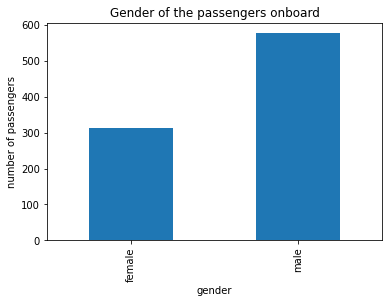

In [7]:
# Bar chart on gender (alternative using kind='bar'; other suitable options are 'barh', 'pie')
titanic.groupby('Sex').size().plot(kind='bar', 
                                  title='Gender of the passengers onboard',
                                  ylabel = "number of passengers", xlabel = "gender")
plt.show()

female


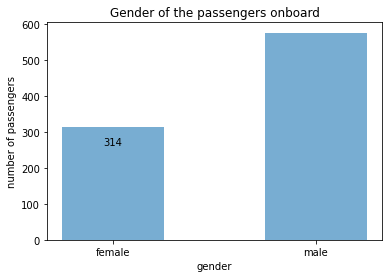

male


In [8]:
# Bar chart on gender (with data values shown) (method 1)
fig, ax = plt.subplots()

plot_data = titanic.groupby('Sex').size()

ax.bar(plot_data.index, plot_data, alpha=0.6, #alpha=0.6 makes bar slightly transparent
      width = 0.5) #argument width=o.5 makes the bars thinner)

ax.set_title('Gender of the passengers onboard')
ax.set_ylabel("number of passengers")
ax.set_xlabel("gender")

for i in range(len(plot_data.index)):
    print(plot_data.index[i])
    ax.text(x=plot_data.index[i], y=plot_data[i]-50, s=int(plot_data[i]), ha='center')
    
    plt.show()

TypeError: annotate() missing 1 required positional argument: 'text'

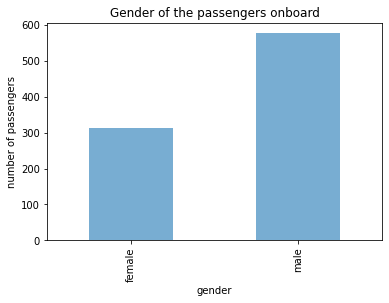

In [10]:
# Bar chart on gender (with data values shown) (method 2)
fig, ax = plt.subplots()

plot_data = titanic.groupby('Sex').size()
ax = plot_data.plot(kind='bar', 
                    title='Gender of the passengers onboard',
                    ylabel = "number of passengers", xlabel = "gender",
                    alpha = 0.6, width = 0.5)

# Iterrating over the bars one-by-one
for bar in ax.patches:
    
    # Using Marplotlib's annotate function and
    # passing the coordinates where the annotation shall be done
    # x-coordinate: bar.get_x() + bar.get_width() / 2
    # y-coordinate: bar.get_height()
    # free space to be left to make graph pleasing: (0, 8)
    # ha and va stand for the horizantal and vertical alignment
    # Reference -- https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/
    ax.annotate(s=bar.get_height(),
               xy=(bar.get_x()+bar.get_width()/2, bar.get_height()),
                ha='center', va='center',
                size=8, xytext=(0, -15),
                textcoords='offset points')
    
plt.show()

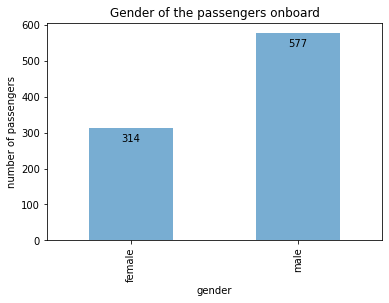

In [11]:
# Bar chart on gender (with data values shown) (method 3)
fig, ax = plt.subplots()

plot_data = titanic.groupby('Sex').size()
ax = plot_data.plot(kind='bar', 
                    title='Gender of the passengers onboard',
                    ylabel = "number of passengers", xlabel = "gender",
                    alpha = 0.6, width = 0.5)

for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x,y = bar.get_xy()
    ax.text(x+width/2,
           y+height-30,
           int(height),
           horizontalalignment='center', verticalalignment='center')
    
plt.show()    

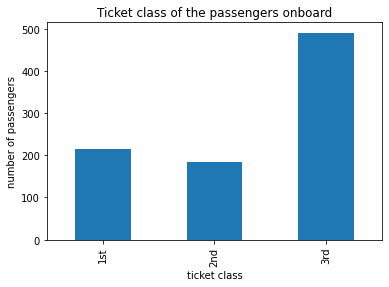

In [12]:
# Bar chart on ticket class
ax = titanic.groupby('Pclass').size().plot.bar(title = 'Ticket class of the passengers onboard',
                                              xlabel = "ticket class", ylabel = "number of passengers")
#ax.set_xticklabels(("1st Class", "2nd Class", "3rd Class"))
plt.show()

## 2. Generate a histogram for the passengers'age. Furthermore, describe the passengers' age using the following two boxplot: age per ticket class and age based on survival.

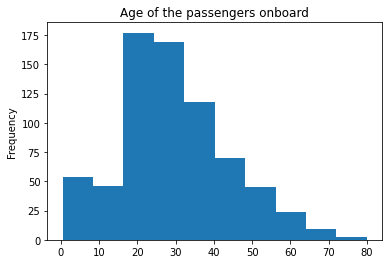

In [13]:
# Historgram on age
titanic['Age'].plot(kind = 'hist', title = "Age of the passengers onboard");

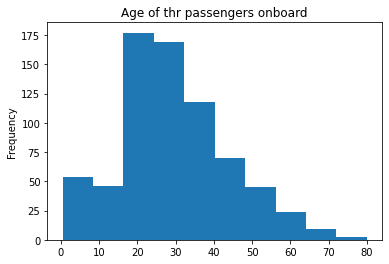

In [14]:
# Histogram on age (alternative)
titanic['Age'].plot.hist(title = "Age of thr passengers onboard");

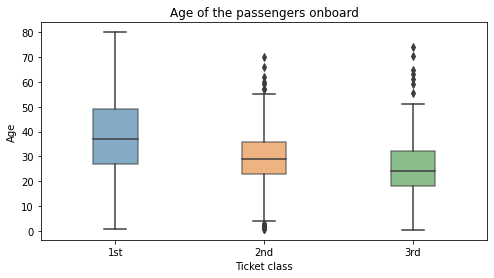

In [16]:
# Boxplot on age (group by ticket class)

fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = titanic, x = 'Pclass', y = 'Age', width = 0.3,
           boxprops = dict(alpha=0.6)) # note in seaborn, alpha (and other parameters) is set in a different way
ax.set_xlabel("Ticket class")
ax.set_title("Age of the passengers onboard")
#ax.set_xticklabels(("1st Class", "2nd Class", "3rd Class"))
plt.show()


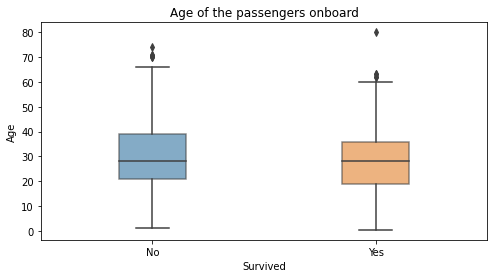

In [17]:
# Boxplot on age (group by survival)

fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = titanic, x = 'Survived', y = 'Age', width = 0.3,
           boxprops = dict(alpha=0.6)) # note in seaborn, alpha (and other parameters) is set in a different way

ax.set_xlabel("Survived")
ax.set_title("Age of the passengers onboard")
#ax.set_xticklabels(("Did Not Survive", "Survived"));
plt.show()

## 3. Generate a histogram for the travel fare and a table showing the number of people who did not pay – you may want to check on Google why a handful of people was on board for free!

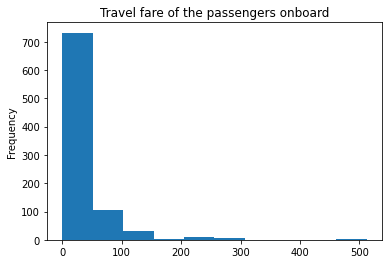

In [18]:
# Histogram on travel fare
titanic['Fare'].plot(kind='hist', title="Travel fare of the passengers onboard", xlabel='fare');

In [19]:
titanic[['Fare']].apply(lambda x: x==0). groupby('Fare').size()

Fare
False    876
True      15
dtype: int64

In [20]:
#List(titanic[['Fare']].apply(lambda x: x==0).groupby('Fare'))

## 4. A chart of your choice to describe the family size per ticket class

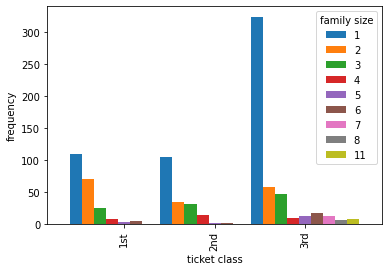

In [21]:
# Bar chart on ticket class and family size

#ax = titanic.groupby(['Pclass', 'family size']).size().unstack().plot.bar(xlabel='ticket class', ylabel='frequency')
ax = titanic.groupby(['Pclass', 'family size']).size().unstack().fillna(0).plot.bar(width=1.2, xlabel='ticket class', ylabel='frequency')
#ax.set_xticklabels(("1st Class", "2nd Class", "3rd Class"))
plt.show()

In [22]:
titanic.groupby(['Pclass', 'family size']).size()

Pclass  family size
1st     1              109
        2               70
        3               24
        4                7
        5                2
        6                4
        7                0
        8                0
        11               0
2nd     1              104
        2               34
        3               31
        4               13
        5                1
        6                1
        7                0
        8                0
        11               0
3rd     1              324
        2               57
        3               47
        4                9
        5               12
        6               17
        7               12
        8                6
        11               7
dtype: int64

In [23]:
titanic.groupby(['Pclass', 'family size']).size().unstack()
#titanic.groupby(['Pclass', 'family size']).size().unstack(Level=-1)
#Level refers level(s) of index to unstack, -1 is last level

family size,1,2,3,4,5,6,7,8,11
Pclass,,,,,,,,,
1st,109,70,24,7,2,4,0,0,0
2nd,104,34,31,13,1,1,0,0,0
3rd,324,57,47,9,12,17,12,6,7


In [24]:
titanic.groupby(['Pclass', 'family size']).size().unstack(level=0)
#titanic.groupby(['Pclass', 'family size']).size().unstack(Level=-2)

Pclass,1st,2nd,3rd
family size,,,
1,109,104,324
2,70,34,57
3,24,31,47
4,7,13,9
5,2,1,12
6,4,1,17
7,0,0,12
8,0,0,6
11,0,0,7


In [25]:
titanic.groupby(['Pclass', 'family size']).size().unstack().fillna(0)

family size,1,2,3,4,5,6,7,8,11
Pclass,,,,,,,,,
1st,109,70,24,7,2,4,0,0,0
2nd,104,34,31,13,1,1,0,0,0
3rd,324,57,47,9,12,17,12,6,7


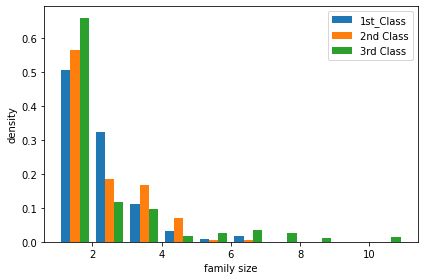

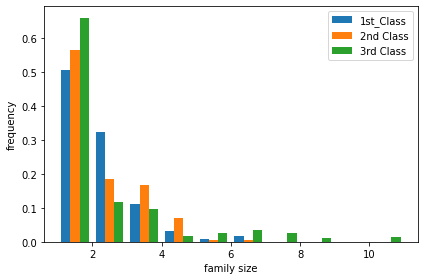

In [26]:
# Histogram to show the family size per ticket class

#plots the histogram (using density by ticket class)
fig, ax = plt.subplots()
ax.hist([titanic.loc[titanic.Pclass==class_idx, "family size"] for class_idx in ['1st', '2nd', '3rd']], density=True,
       label=['1st_Class', '2nd Class', '3rd Class'])
ax.set_ylabel("density")
ax.set_xlabel("family size")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()

#plots the histogram (using frequency)
fig, ax = plt.subplots()
ax.hist([titanic.loc[titanic.Pclass==class_idx, "family size"] for class_idx in ['1st', '2nd', '3rd']], density=True,
       label=['1st_Class', '2nd Class', '3rd Class'])
ax.set_ylabel("frequency")
ax.set_xlabel("family size")
plt.tight_layout()
plt.legend(loc='upper right')
plt.show()


TypeError: 'method' object is not subscriptable

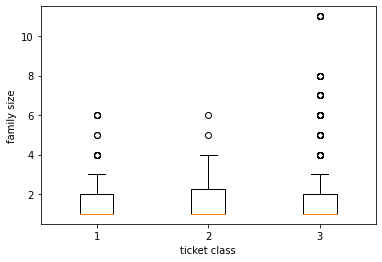

In [27]:
#plots the boxplots

np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning)

fig, ax = plt.subplots()
ax.boxplot([titanic[titanic['Pclass']=='1st']['family size'],
           titanic[titanic['Pclass']=='2nd']['family size'],
           titanic[titanic['Pclass']=='3rd']['family size']])

ax.set_ylabel("family size")
ax.set_xlabel("ticket class")
ax.set_xticklabels['1st class', '2nd class', '3rd class']

plt.tight_layout()
plt.show()

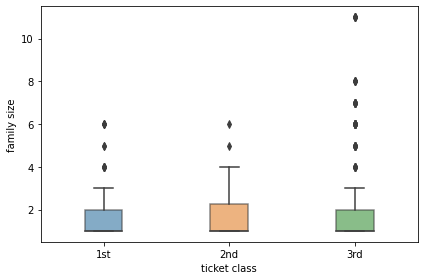

In [29]:
# Boxplots to show the family size per ticket class (alternative - using seaborn)

#plots the boxplots

fig, ax = plt.subplots()
ax = sns.boxplot(data = titanic, x = 'Pclass', y = 'family size', width = 0.3,
           boxprops = dict(alpha=0.6)) # in seaborn, alpha (and other parameters) is set in a different way

#ax = sns.boxplot(data = titanic, x = 'Survived', y = 'Age', width = 0.3,
#           boxprops = {alpha=0.6}) # note in seaborn, alpha (and other parameters) is set in a different way

ax.set_ylabel("family size")
ax.set_xlabel("ticket class")
#ax.set_xticklabels['1st class', '2nd class', '3rd class']

plt.tight_layout()
plt.show()

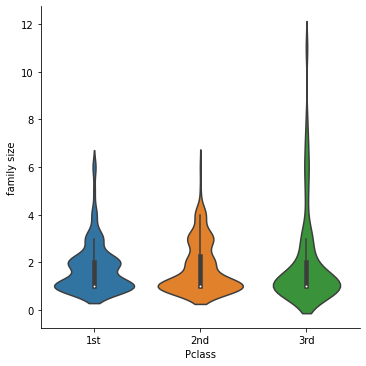

In [30]:
# Additional plots (1)
sns.catplot(x='Pclass', y='family size', data=titanic, kind='violin')
ax.set_ylabel("family size")
ax.set_xlabel("ticket class")
plt.show()

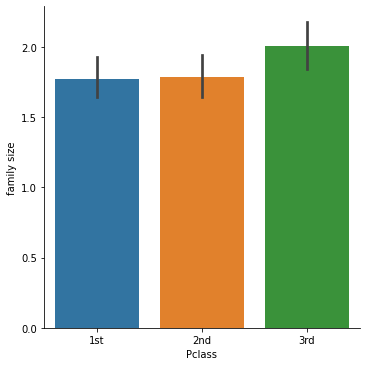

In [31]:
# Additional plots (2)
sns.catplot(x='Pclass', y='family size', data=titanic, kind='bar', estimator=np.mean) #default estimator is mean
ax.set_ylabel("family size")
ax.set_xlabel("ticket class (mean)")
plt.show()

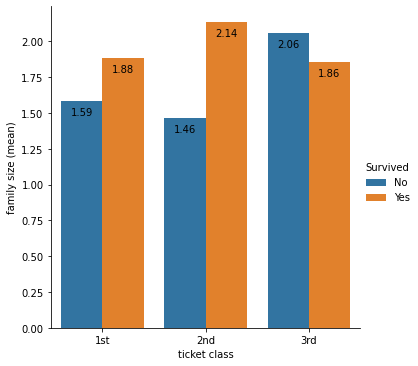

In [32]:
# Additional plots (2 with data values shown)

g = sns.catplot(x='Pclass', y='family size', hue='Survived', data=titanic, kind='bar', ci=False, estimator=np.mean)

plt.xlabel("ticket class")
plt.ylabel("family size (mean)")

# extract the matplotlib axes_subplot objects from the FaceGrid
ax = g.facet_axis(0,0)
for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.text(x+width/2,
           y+height-0.1,
           round(height, 2),
           size=10,
           horizontalalignment='center')
    
plt.show()    

## 5. A series of stacked bar charts to show the how survival differs for different gender and ticket class

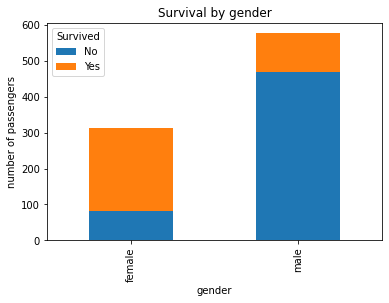

In [35]:
# Stacked bar chart on survival by gender

survival = titanic.groupby(['Sex', 'Survived']).size().unstack()
#survival.columns = ["Did Not Survive", "Survived"]
ax = survival.plot(kind='bar', stacked=True, ylabel='number of passengers', xlabel="gender", title="Survival by gender")

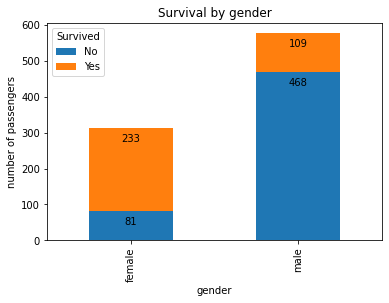

In [36]:
# Stacked bar chart on survival by gender (with data values shown)

survival = titanic.groupby(['Sex', 'Survived']).size().unstack()
#survival.columns = ["Did Not Survive", "Survived"]
ax = survival.plot(kind='bar', stacked=True, ylabel='number of passengers', xlabel="gender", title="Survival by gender")

for bar in ax.patches:
    width, height = bar.get_width(), bar.get_height()
    x, y = bar.get_xy()
    ax.text(x+width/2,
           y+height-30,
           int(height),
           horizontalalignment='center', verticalalignment='center')

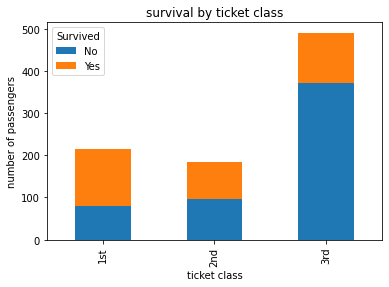

In [34]:
# Stacked bar chart on survival by ticket class

survival = titanic.groupby(['Pclass', 'Survived']).size().unstack()
#survival.columns = ["Did Not Survive", "Survived"]
#survival.index = ['1st class', '2nd class', '3rd class']
survival.plot(kind='bar', stacked = True, ylabel = 'number of passengers',
             xlabel = "ticket class", title = "survival by ticket class");

## 6. A violin chart describing how survival related to age and gender

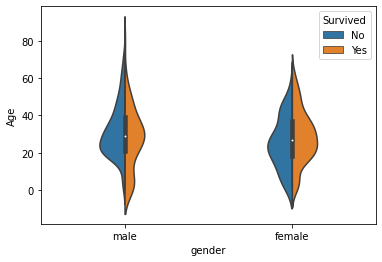

In [37]:
ax = sns.violinplot(data=titanic, x='Sex', y='Age', hue='Survived', width=0.3, split=True)
#ax = sns.violinplot(data=titanic, x='Sex', y='Age', hue='Survived', width=0.3)
ax.set_xlabel("gender")
plt.show()

## 7. A violin chart describing the survival rate related to age and ticket class

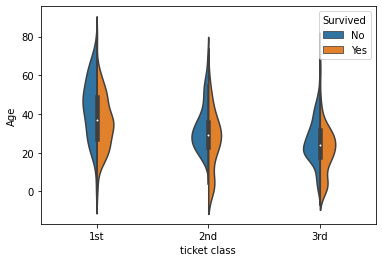

In [38]:
ax = sns.violinplot(data=titanic, x='Pclass', y='Age', hue='Survived', width=0.3, split=True)
ax.set_xlabel("ticket class")
#ax.set_xticklabels(['1st class', '2nd class', '3rd class'])
plt.show()

# Load data

In [78]:
# We use Jan 2021 data
trade_latest = pd.read_excel("Direction_of_Trade_Statistics_DOTS-2.xlsx", skiprows=2, index_col=0, nrows=7)
trade_latest

,Canada,France,Germany,Italy,Japan,United Kingdom,United States,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
Canada,NaN,182.352251,415.434050,181.372819,800.140783,1524.279961,26703.649930,NaN,NaN,NaN,NaN,NaN,NaN
France,296.530252,NaN,6505.206225,3609.776382,671.816793,2211.514881,3015.829720,NaN,NaN,NaN,NaN,NaN,NaN
Germany,765.144447,9554.027691,NaN,6551.519107,1806.710463,5399.090567,10320.618698,NaN,NaN,NaN,NaN,NaN,NaN
Italy,331.691541,4508.622429,5843.193707,NaN,687.903277,1543.974648,3610.256832,NaN,NaN,NaN,NaN,NaN,NaN
Japan,676.496486,497.472551,1527.882819,377.796492,NaN,795.671765,9699.242166,NaN,NaN,NaN,NaN,NaN,NaN
United Kingdom,712.170095,1131.013426,2270.212716,532.081105,776.292689,NaN,5103.885679,NaN,NaN,NaN,NaN,NaN,NaN
United States,21217.187629,1996.406425,4516.721760,1815.032006,6017.644718,4670.679914,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [79]:
trade_latest.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

# Create network

In [80]:
trade_latest = pd.melt(trade_latest.reset_index(), id_vars='index')
trade_latest.columns = ['export_country', 'import_country', 'value']
trade_latest.head()

,export_country,import_country,value
0,Canada,Canada,NaN
1,France,Canada,296.530252
2,Germany,Canada,765.144447
3,Italy,Canada,331.691541
4,Japan,Canada,676.496486


In [81]:
trade_latest.dropna(inplace=True)
trade_latest.head()

,export_country,import_country,value
1,France,Canada,296.530252
2,Germany,Canada,765.144447
3,Italy,Canada,331.691541
4,Japan,Canada,676.496486
5,United Kingdom,Canada,712.170095


In [82]:
G = nx.Graph()

for index, row in trade_latest.iterrows():
    G.add_edge(row['export_country'], row['import_country'], weight=row['value'])

# remove isolated vertices (if any)
remove = [node for node, degree in G.degree() if degree ==0]
G.remove_nodes_from(remove)

#Setting size and colours
option = {
    'node_color': 'lightblue',
    'edge_color': 'lightblue',
    'node_size': 1,
    'width': 1,
    'alpha': 1.0}


# Draw graph

NetworkXError: random_state_index is incorrect

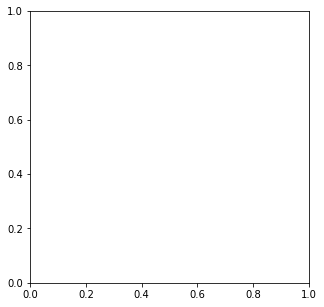

In [83]:
# Spring layout
plt.subplots(figsize=(5,5))
pos=nx.spring_layout(G)
nx.draw(G,pos=pos,font_size=9, **options)
nx.draw_networkx_labels(G,pos=pos,font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

NetworkXError: random_state_index is incorrect

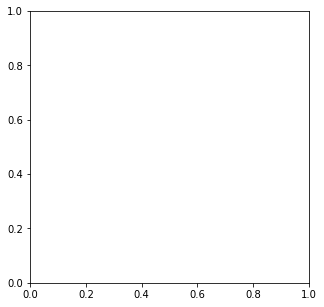

In [84]:
# Random layout

plt.subplots(figsize=(5,5))
pos=nx.random_layout(G)
nx.draw(G, pos=pos, font_size=9, **options)
nx.draw_networkx_labels(G, pos=pos, font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

NameError: name 'options' is not defined

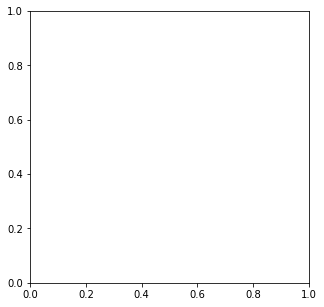

In [49]:
# Circular layout

plt.subplots(figsize=(5,5))
pos=nx.circular_layout(G)
nx.draw(G, pos=pos, font_size=9, **options)
nx.draw_networkx_labels(G, pos=pos, font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

In [50]:
# save network graph for next part of assignment

import pickle

f = open("graph_pickle_latest", "wb") # open file for writing in binary mode
pickle.dump(G, file = f)
f.close()

NameError: name 'options' is not defined

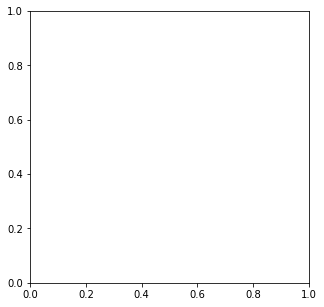

In [51]:
# Try re-loading saved network graph and draw using different layout

with open ('graph_pickle_latest', 'rb') as f:
    x = pickle.load(f)
f.close()

plt.subplots(figsize=(5,5))
pos=nx.kamada_kawai_layout(x)
nx.draw(G, pos=pos, font_size=9, **options)
nx.draw_networkx_labels(G, pos=pos, font_size=9)
plt.tight_layout()
plt.axis('off');
plt.show()

## Repeat with last year's data to compare with latest year
### Load data for last year

In [85]:
trade_lastyr = pd.read_excel("Direction_of_Trade_Statistics_DOTS.xlsx", skiprows=2, index_col=0, nrows=7)
trade_lastyr

,Canada,France,Germany,Italy,Japan,United Kingdom,United States
Canada,NaN,259.774344,356.288051,158.939284,773.170192,1458.702675,26820.721998
France,270.237104,NaN,6417.619201,3508.833909,544.862858,2661.826775,3224.726246
Germany,930.537387,9728.952620,NaN,6275.083846,1864.776857,6684.246718,10084.260578
Italy,385.157291,4467.007832,5332.205501,NaN,717.384897,2268.802893,4142.482815
Japan,742.191653,482.307729,1487.667310,373.958913,NaN,1331.326120,9664.659178
United Kingdom,547.707600,2434.150113,4016.820126,984.401990,538.725446,NaN,6139.224086
United States,22550.409387,3494.204301,4718.306603,1742.348778,5454.467853,5832.579169,NaN


In [86]:
trade_lastyr.index

Index(['Canada', 'France', 'Germany', 'Italy', 'Japan', 'United Kingdom',
       'United States'],
      dtype='object')

# Create Graph

In [87]:
trade_lastyr = pd.melt(trade_latest.reset_index(), id_vars='index')
trade_lastyr.columns = ['export_country', 'import_country', 'value']
trade_lastyr.head()

/Users/eaindraykhin/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3437: FutureWarning: This dataframe has a column name that matches the 'value_name' column name of the resulting Dataframe. In the future this will raise an error, please set the 'value_name' parameter of DataFrame.melt to a unique name.
  exec(code_obj, self.user_global_ns, self.user_ns)


,export_country,import_country,value
0,1,export_country,France
1,2,export_country,Germany
2,3,export_country,Italy
3,4,export_country,Japan
4,5,export_country,United Kingdom


In [88]:
trade_lastyr.dropna(inplace=True)
trade_lastyr.head()

,export_country,import_country,value
0,1,export_country,France
1,2,export_country,Germany
2,3,export_country,Italy
3,4,export_country,Japan
4,5,export_country,United Kingdom


In [57]:
G_lastyear = nx.Graph()

for index, row in trade_lastyr.iterrows():
    G_lastyear.add_edge(row['export_country'], row['import_country'], weight=row['value'])
    
# remove isolated vertices (if any)
remove = [node for node, degree in G.degree() if degree ==0]
G_lastyear.remove_nodes_from(remove)

#Setting size and colours
option = {
    'node_color': 'lightblue',
    'edge_color': 'lightblue',
    'node_size': 1,
    'width': 1,
    'alpha': 1.0}

## Load back latest year's network graph

In [89]:
#load back latest year's network graph
import pickle

f = open("graph_pickle_latest", "rb")
G_latest = pickle.load(f)
f.close()

## Draw graphs to compare the output with the latest results using a 3x2 subplot containing all the network representations

NetworkXError: random_state_index is incorrect

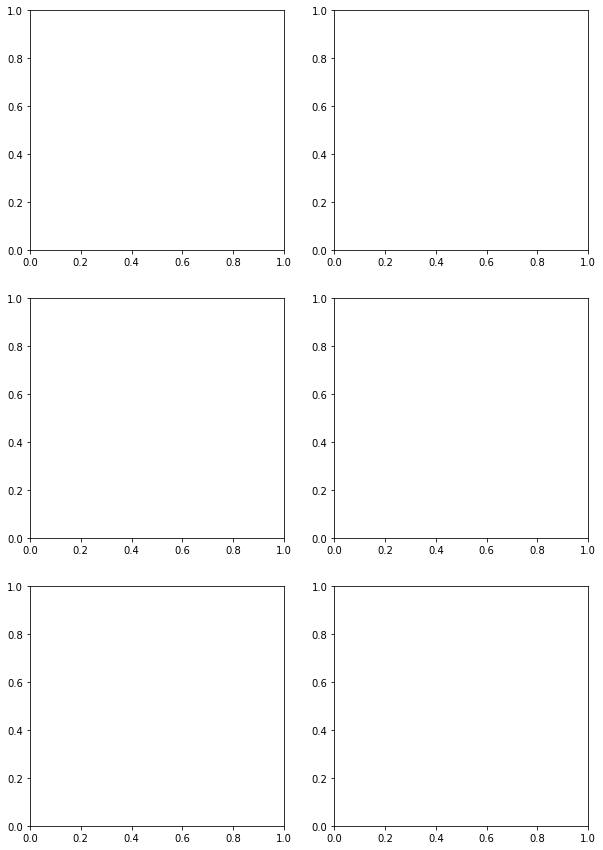

In [90]:
fig, ax = plt.subplots(3, 2, figsize = (10, 15))
layouts = {"spring": nx.spring_layout, "random": nx.random_layout, "circular": nx.circular_layout}
graphs = {"latest": G_latest, "last year's": G_lastyear}

for i, (layout_name, layout) in enumerate(layouts.items()):
    for j, (graph_name, graph) in enumerate(graphs.items()):
        pos = layout(graph)
        nx.draw_networkx(graph, pos=pos, ax=ax[i][j], font_size=9, **options)
        plt.tight_layout()
        ax[i][j].set_axis_off()
        ax[i][j].set_title(f"{layout_name} layout for {graph_name} data")

In [60]:
print(list(enumerate(layouts.items()))) #enumerate adds a counter to an iterable
print(list(enumerate(graphs.item())))

[(0, ('spring', <function fruchterman_reingold_layout at 0x7fb217499280>)), (1, ('random', <function random_layout at 0x7fb21748bee0>)), (2, ('circular', <function circular_layout at 0x7fb21748bdc0>))]


AttributeError: 'dict' object has no attribute 'item'